In [14]:
import pandas as pd
import time, requests, re
import matplotlib.pyplot as plt


import numpy as np
import seaborn as sns 
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.style.use('ggplot')
# sns.set_style("whitegrid", {'axes.grid' : True})

%matplotlib inline

# Augusts graphics

In [19]:
merged.tail(10)

,year,area,sektor,jobtype,n_jobtype_area,n_sektor_area,n_sektor,n_area,n_year,20-64years_area,...,FD_sektor,FD_area,FD_year,"BNP, 1000 kr. (2010)",FD_BNP,ratio_jobtype_area,ratio_sektor_area,ratio_sektor,ratio_area,ratio_year
4940,2017,region-sjaelland,social,pleje,2431,6330,45693,25973,266462,462645,...,1349.0,-368.0,-5600.0,1998.975791,44.499042,6.561939,-0.224724,30.315259,-8.269841,-125.845406
4941,2017,region-sjaelland,social,psykologi,197,6330,45693,25973,266462,462645,...,1349.0,-368.0,-5600.0,1998.975791,44.499042,0.471920,-0.224724,30.315259,-8.269841,-125.845406
4942,2017,region-sjaelland,social,socialraadgivning,487,6330,45693,25973,266462,462645,...,1349.0,-368.0,-5600.0,1998.975791,44.499042,1.168564,-0.224724,30.315259,-8.269841,-125.845406
4943,2017,region-sjaelland,social,tandlaege,232,6330,45693,25973,266462,462645,...,1349.0,-368.0,-5600.0,1998.975791,44.499042,0.471920,-0.224724,30.315259,-8.269841,-125.845406
4944,2017,region-sjaelland,social,teknisksundhed,77,6330,45693,25973,266462,462645,...,1349.0,-368.0,-5600.0,1998.975791,44.499042,0.269669,-0.224724,30.315259,-8.269841,-125.845406
4945,2017,region-sjaelland,social,terapi,360,6330,45693,25973,266462,462645,...,1349.0,-368.0,-5600.0,1998.975791,44.499042,-0.067417,-0.224724,30.315259,-8.269841,-125.845406
4946,2017,region-sjaelland,undervisning,bibliotek,40,4499,43176,25973,266462,462645,...,985.0,-368.0,-5600.0,1998.975791,44.499042,0.382031,5.191123,22.135308,-8.269841,-125.845406
4947,2017,region-sjaelland,undervisning,forskning,594,4499,43176,25973,266462,462645,...,985.0,-368.0,-5600.0,1998.975791,44.499042,2.943884,5.191123,22.135308,-8.269841,-125.845406
4948,2017,region-sjaelland,undervisning,laerer,1475,4499,43176,25973,266462,462645,...,985.0,-368.0,-5600.0,1998.975791,44.499042,-3.505693,5.191123,22.135308,-8.269841,-125.845406
4949,2017,region-sjaelland,undervisning,paedagog,2197,4499,43176,25973,266462,462645,...,985.0,-368.0,-5600.0,1998.975791,44.499042,5.303485,5.191123,22.135308,-8.269841,-125.845406


In [51]:
raw='https://raw.githubusercontent.com/Naeim-S/GRP33/master/EXAM/merged_ratio.csv'
merged=pd.read_csv(raw)
del merged['Unnamed: 0']

sektor_order=merged.sektor.unique()
area_order=merged.area.unique()

In [52]:
merged.tail(10)

,year,area,sektor,jobtype,n_jobtype_area,n_sektor_area,n_sektor,n_area,n_year,20-64years_area,...,AR_jobtype_area,AR_sektor_area,AR_sektor,AR_area,AR_year,RR_jobtype_area,RR_sektor_area,RR_sektor,RR_area,RR_year
4940,2017,region-sjaelland,social,pleje,2431,6330,45693,25973,266462,462645,...,6.561939,-0.224724,30.315259,-8.269841,-125.845406,5.995866,-0.069277,1.336155,-0.613614,-0.904066
4941,2017,region-sjaelland,social,psykologi,197,6330,45693,25973,266462,462645,...,0.471920,-0.224724,30.315259,-8.269841,-125.845406,5.240666,-0.069277,1.336155,-0.613614,-0.904066
4942,2017,region-sjaelland,social,socialraadgivning,487,6330,45693,25973,266462,462645,...,1.168564,-0.224724,30.315259,-8.269841,-125.845406,5.250419,-0.069277,1.336155,-0.613614,-0.904066
4943,2017,region-sjaelland,social,tandlaege,232,6330,45693,25973,266462,462645,...,0.471920,-0.224724,30.315259,-8.269841,-125.845406,4.371361,-0.069277,1.336155,-0.613614,-0.904066
4944,2017,region-sjaelland,social,teknisksundhed,77,6330,45693,25973,266462,462645,...,0.269669,-0.224724,30.315259,-8.269841,-125.845406,8.108635,-0.069277,1.336155,-0.613614,-0.904066
4945,2017,region-sjaelland,social,terapi,360,6330,45693,25973,266462,462645,...,-0.067417,-0.224724,30.315259,-8.269841,-125.845406,-0.362990,-0.069277,1.336155,-0.613614,-0.904066
4946,2017,region-sjaelland,undervisning,bibliotek,40,4499,43176,25973,266462,462645,...,0.382031,5.191123,22.135308,-8.269841,-125.845406,32.463918,2.377209,1.025407,-0.613614,-0.904066
4947,2017,region-sjaelland,undervisning,forskning,594,4499,43176,25973,266462,462645,...,2.943884,5.191123,22.135308,-8.269841,-125.845406,12.427110,2.377209,1.025407,-0.613614,-0.904066
4948,2017,region-sjaelland,undervisning,laerer,1475,4499,43176,25973,266462,462645,...,-3.505693,5.191123,22.135308,-8.269841,-125.845406,-4.200979,2.377209,1.025407,-0.613614,-0.904066
4949,2017,region-sjaelland,undervisning,paedagog,2197,4499,43176,25973,266462,462645,...,5.303485,5.191123,22.135308,-8.269841,-125.845406,5.285843,2.377209,1.025407,-0.613614,-0.904066


In [82]:
#list(merged)

-
 **-Følgende afsnit udelades:** 
 ___
Starting with _Figure CA_ we see the plotting for the region Capital Area. With all sectors within the area showing a positive relationship with the development in BNP from 2007 to 2009, the sectors split by 2010. This leaves the social- and educational sector at a negative relationship in the 10-percentage relative change rate. The remainder of the sectors pose a positive relationship with levels of relative change ranging from 0-percentage for trade, to 25-percentage for IT. The negative relations disappear by 2011, and in the 2012 we see a large fluctuation of sector in both negative and positive direction. In this we find the management sector at a negative relation of 25-percentage relative change, whilst on the other hand the social sector poses the highest relative change of the area, with 150-percentage positive relationship. By 2014 we find that the sectors cluster around a positive relationship to BNP at between 5-percentage relative change for trade and 25-percentage relative change for the IT-sector. By 2016 and through to 2017 all sectors follow a similar trend, distributing around 0-percentage relative change, and slight positive or negative relationships.  

_Figure CJ_ shows the plotting of relative first differences ratio to BNP for the region of Central Jutland. With all sector but education posing a positive relationship to development in the BNP in 2008, the sectors cluster around a 10-percentage relative change in 2009. By 2010 the sector split, with the educational-, social-, and trade sectors showing a negative relationship, and the remainder of the sectors showing positive relationships in the range of 10- to 50-percentage relative change. This split is furthered with the fluctuation in 2012. Social-, educational, and others sectors show a positive relationship at 100-percentage relative change or upward. Trade- and industrial sectors are found near a 0-percentage relative change mark, and the remaining four sectors show negative relationships. For the years 2013 through to 2017, the sectors cluster at a positive relationship of around 10-percentage relative change.  

_Figure SD_ plots the development for the region of Southern Denmark. General trends for sectors are followed, with most sectors showing similar patterns before and after 2012. Standing out we find that the It-sector shows a positive relationship with the development of BNP for all years expect for 2012. This positive relationship peaks at a 35- and 20-percentage relative change in 2010 and 2015 respectively. Like previous graphs the sectors generally cluster by 2014 at a positive relationship between 5- and 15-percentage relative change and follows this pattern through to 2017.  

_Figure Zealand_ plots the development for the region of Zealand. Contrary to previous figures we find that both social- and IT-sectors pose a negative relationship at around 20-percentage relative change by 2008. A similar pattern to previous figures is however repeated when sectors cluster in 2009 at all positive relationships to the development in BNP. The pattern however changes when most sectors move onto a negative relationship with only a slight relative change in 2011, before the fluctuations of 2012, in which all sectors but management show positive relations, and with the IT-sector peaking at around 120-percentage relative change. By 2014 through to 2017 sectors follow a similar trend of positive relations in the 5- to 20-percentage range of relative change, and some sectors showing negative relations by 2015 and 2016.  

_Figure NJ_ plots the development of the region of Northern Jutland. All sectors but the educational and social generally show positive relationships to the development of BNP until 2011, 2012 when fluctuations occur. Thus, we find the IT-sector to be the only sector with a negative relationship, with the remaining sectors grouping at positive relationships in the range of 25- to around 50- percentage, and 100- to 145-percentage relative change. By 2014 sectors cluster at positive relationships with relative change in the range of 0- to 25-percentage.
___



## Development on the level of jobtypes in sectors within areas  
On the level of jobtypes of select sectors within select areas we return to the four examples presented in the previous chapter of descriptive statistics. _Figure X_ plots development in relative first differences ratio to BNP for jobtypes in sectors IT and office work for the region Capital Area, and trade and industry for Zealand. Worth noting is that the jobtype of IT-courses in the Capital Area has been left out, as the jobtype saw a rise from 1 to 175 going from 2013 to 2014. This prompted a degree of relative change at 17500-percentage thus making the figure highly uninterpretable. Similar action has been taken towards the jobtype of office-courses for sector office work, as the level of relative change hit 300-percentage, and as thus was deemed a disturbing outlier.

Starting with the region of Capital Area, we find that jobtypes in the sector IT presents some diversity, with jobtypes telecommunication and system development starting at a positive relationship, and remaining jobtypes at a negative. With fluctuations splitting the relationship of jobtypes between both positive and negative, this even out by 2013 through to 2017, with some jobtypes briefly finding themselves at a negative relationship.
For jobtypes in the sector of office work, all positions start at a positive relationship ranging from 20- to 60-percentage relative change. This seems to hold true through to 2012, with some jobtypes showing a negative relationship. By 2013 through to 2017 jobtypes cluster at a level of relative change between 0- and 30-percentage, showing generally positive relationships with development in BNP. Translation stands out for the period until 2016 when it returns to the level of the remaining jobtypes.

For jobtypes in both the industry- and the trade sector in region Zealand similar patterns occur. All jobtypes pose a positive relationship to development in BNP by 2007, dropping in level of relative change though to 2008. By 2009 a split occurs, with jobtypes finding themselves close to the level of 0-percentage relative change and the sectors finding jobs that pose both positive- and negative relationships. For the trade sector delivery stands out, with a positively related level of relative change above 100-percentage. With fluctuations in 2012 the trade sector finds a majority of jobs posing negative relationships with high levels of relative change, whilst the industry sector shows a somewhat even distribution of jobtypes with positive- and negative relationships. For industry jobtypes electrician and paint show relative change in positive relation to BNP at 200- and 300-percentage respectively. By 2013 through to 2017 jobtypes in both sectors cluster at generally relationships, with some jobtypes briefly showing a negative relationship by 2016.  The level of relative change is generally in the range of minus 5- to plus 50-percentage, however with childcare in the trade sector showing a level of 100-percentage relative change in 2013.




Text(0.5,20.8,'Year')

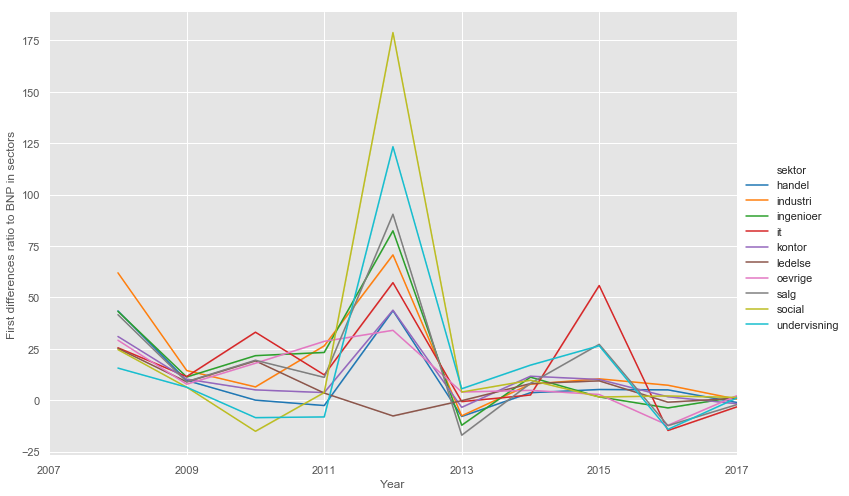

In [55]:
#Exclude "danmark" and sort by n_area and year (for nicer plot):
#merged_sektor = merged.query('sektor').sort_values(by=["ratio_sektor","year"], ascending=False)

sns.set_palette("tab10")
sns.relplot(x="year", y="RR_sektor", 
            hue="sektor", 
            kind="line", 
            height=7, 
            aspect=1.5, 
            legend = "brief",
            hue_order=sektor_order,
            data=merged)
plt.ylabel("First differences ratio to BNP in sectors")
#plt.yticks(range(0,100,10))
plt.xlim(2007,2017)
plt.xticks(range(2007,2018,2))
plt.xlabel("Year")

# All jobs for each area over time

Text(0.5,20.8,'Year')

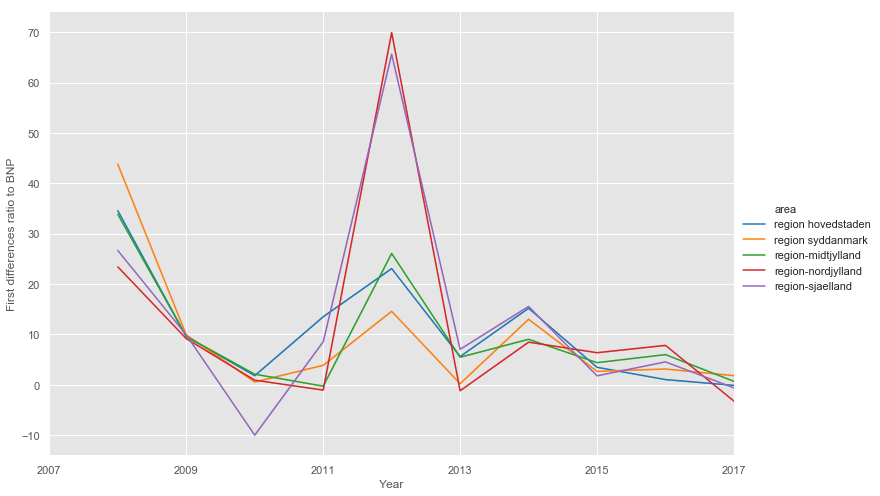

In [58]:
#Exclude "danmark" and sort by n_area and year (for nicer plot):
#merged_area = merged.query(' area != "danmark"').sort_values(by=["ratio_area","year"], ascending=False)

sns.set_palette("tab10")
sns.relplot(x="year", y="RR_area", 
            hue="area", 
            kind="line", 
            height=7, 
            aspect=1.5, 
            legend = "brief",
            hue_order=area_order,
            data=merged)
plt.ylabel("First differences ratio to BNP")
#plt.yticks(range(0,100,10))
plt.xlim(2007,2017)
plt.xticks(range(2007,2018,2))
plt.xlabel("Year")

# All jobs for each area over time

Text(0.5,1,'First differences ratio to BNP by sector in Region Northern Jutland')

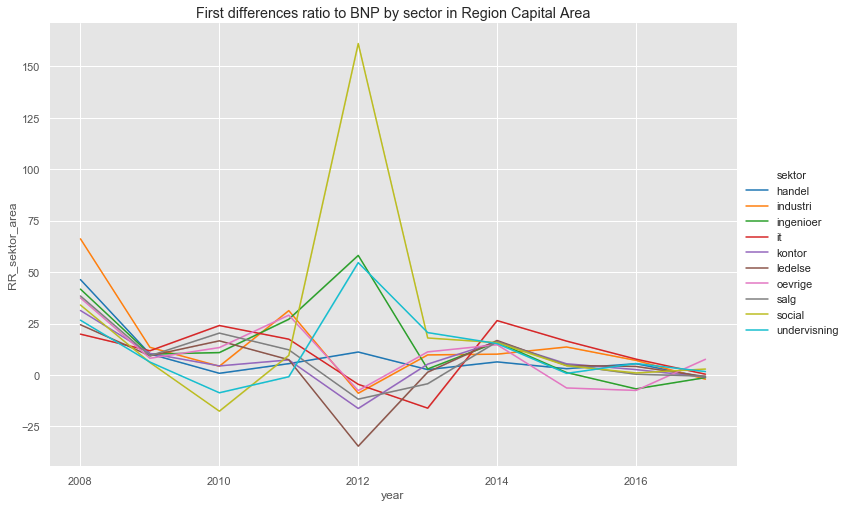

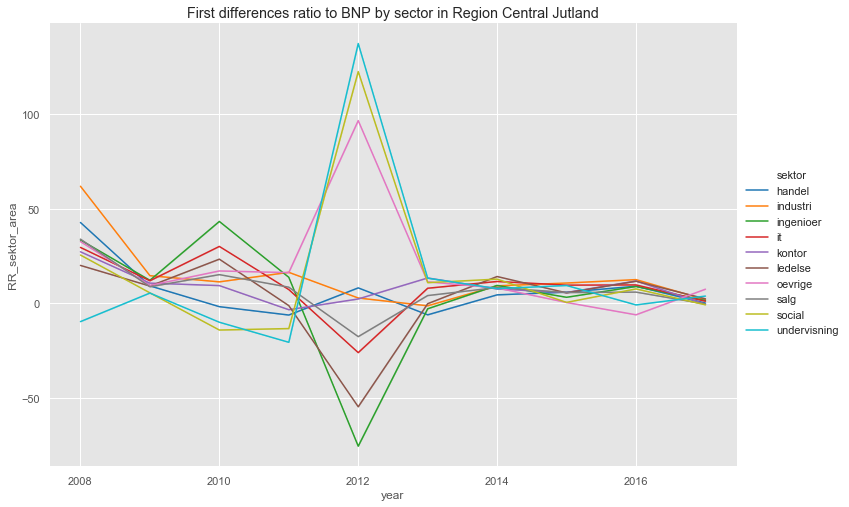

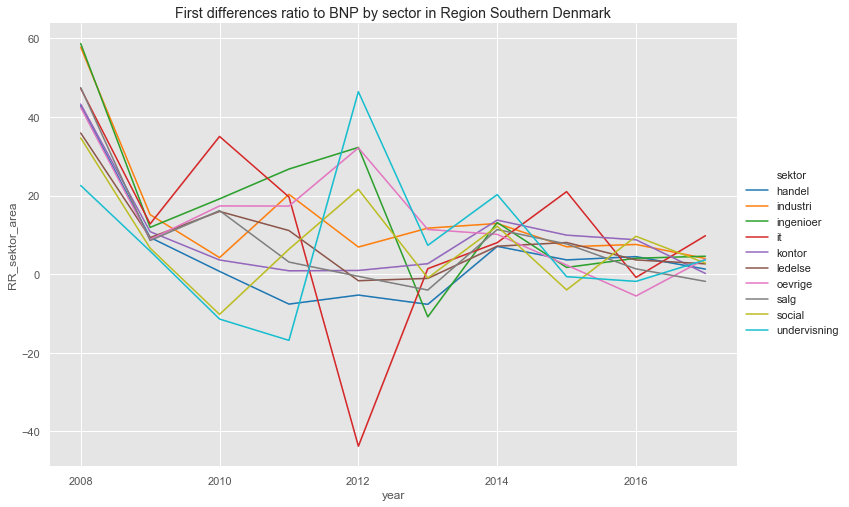

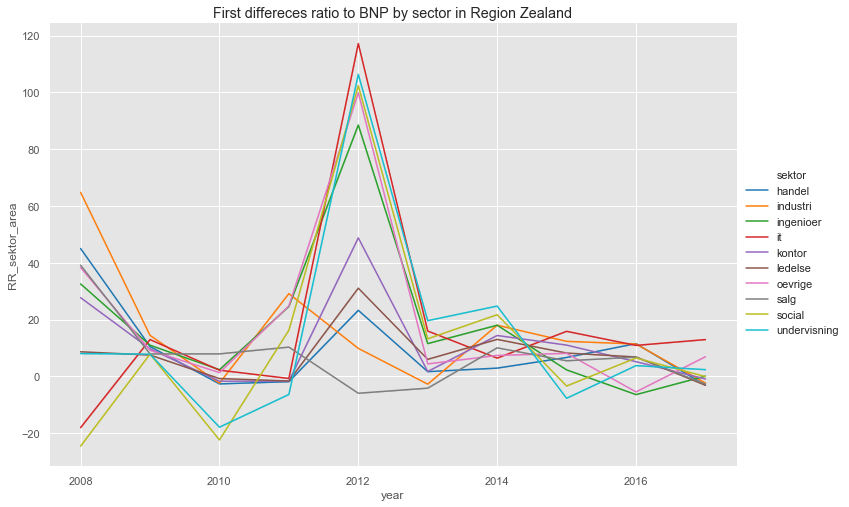

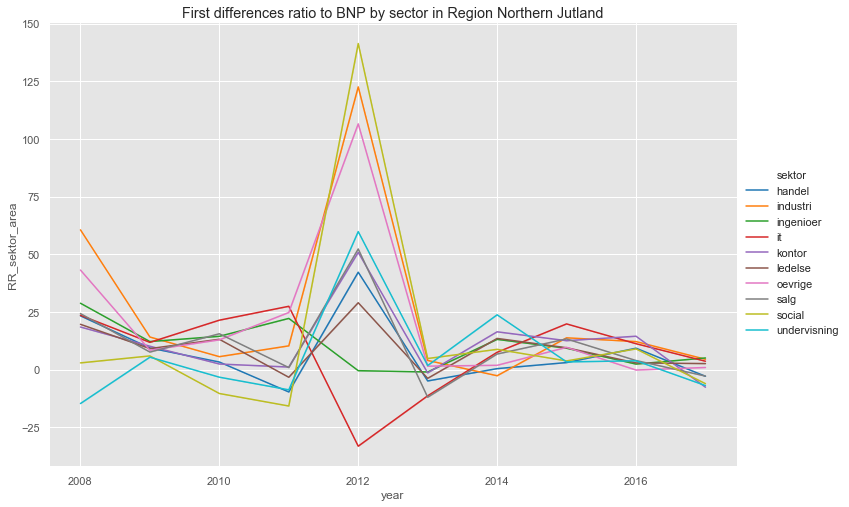

In [79]:
#All sectors for each area over time - FD to BNP ratio

sns.set_palette("tab10")

#KØBENHAVN
sns.relplot(x="year", y="RR_sektor_area", 
        hue="sektor", 
        kind="line", 
        legend = "brief",        
        height=7, 
        aspect=1.5, 
        hue_order=sektor_order,
        data=merged.query('area == "region hovedstaden"').sort_values(by=["year", "ratio_sektor_area"], ascending=False))
plt.title("First differences ratio to BNP by sector in Region Capital Area")

#MIDTJYLLAND
sns.relplot(x="year", y="RR_sektor_area", 
        hue="sektor", 
        kind="line", 
        height=7, 
        aspect=1.5, 
        legend = "brief",
        hue_order=sektor_order,
        data=merged.query('area == "region-midtjylland" ').sort_values(by=["year", "ratio_sektor_area"], ascending=False))
plt.title("First differences ratio to BNP by sector in Region Central Jutland")

#SYDJYLLAND
sns.relplot(x="year", y="RR_sektor_area", 
        hue="sektor", 
        kind="line",
        height=7, 
        aspect=1.5, 
        legend = "brief",
        hue_order=sektor_order,
        data=merged.query('area == "region syddanmark" ').sort_values(by=["year", "ratio_sektor_area"], ascending=False))
plt.title("First differences ratio to BNP by sector in Region Southern Denmark")

#REGION SJÆLLAND
sns.relplot(x="year", y="RR_sektor_area", 
        hue="sektor", 
        kind="line", 
        height=7, 
        aspect=1.5, 
        legend = "brief",
        hue_order=sektor_order,
        data=merged.query('area == "region-sjaelland" ').sort_values(by=["year", "ratio_sektor_area"], ascending=False))
plt.title("First differeces ratio to BNP by sector in Region Zealand")


#NORDJYLLAND
sns.relplot(x="year", y="RR_sektor_area", 
        hue="sektor", 
        kind="line", 
        height=7, 
        aspect=1.5, 
        legend = "brief",
        hue_order=sektor_order,
        data=merged.query('area == "region-nordjylland" ').sort_values(by=["year", "ratio_sektor_area"], ascending=False))
plt.title("First differences ratio to BNP by sector in Region Northern Jutland")



In [60]:
merged.tail(10)

,year,area,sektor,jobtype,n_jobtype_area,n_sektor_area,n_sektor,n_area,n_year,20-64years_area,...,AR_jobtype_area,AR_sektor_area,AR_sektor,AR_area,AR_year,RR_jobtype_area,RR_sektor_area,RR_sektor,RR_area,RR_year
4940,2017,region-sjaelland,social,pleje,2431,6330,45693,25973,266462,462645,...,6.561939,-0.224724,30.315259,-8.269841,-125.845406,5.995866,-0.069277,1.336155,-0.613614,-0.904066
4941,2017,region-sjaelland,social,psykologi,197,6330,45693,25973,266462,462645,...,0.471920,-0.224724,30.315259,-8.269841,-125.845406,5.240666,-0.069277,1.336155,-0.613614,-0.904066
4942,2017,region-sjaelland,social,socialraadgivning,487,6330,45693,25973,266462,462645,...,1.168564,-0.224724,30.315259,-8.269841,-125.845406,5.250419,-0.069277,1.336155,-0.613614,-0.904066
4943,2017,region-sjaelland,social,tandlaege,232,6330,45693,25973,266462,462645,...,0.471920,-0.224724,30.315259,-8.269841,-125.845406,4.371361,-0.069277,1.336155,-0.613614,-0.904066
4944,2017,region-sjaelland,social,teknisksundhed,77,6330,45693,25973,266462,462645,...,0.269669,-0.224724,30.315259,-8.269841,-125.845406,8.108635,-0.069277,1.336155,-0.613614,-0.904066
4945,2017,region-sjaelland,social,terapi,360,6330,45693,25973,266462,462645,...,-0.067417,-0.224724,30.315259,-8.269841,-125.845406,-0.362990,-0.069277,1.336155,-0.613614,-0.904066
4946,2017,region-sjaelland,undervisning,bibliotek,40,4499,43176,25973,266462,462645,...,0.382031,5.191123,22.135308,-8.269841,-125.845406,32.463918,2.377209,1.025407,-0.613614,-0.904066
4947,2017,region-sjaelland,undervisning,forskning,594,4499,43176,25973,266462,462645,...,2.943884,5.191123,22.135308,-8.269841,-125.845406,12.427110,2.377209,1.025407,-0.613614,-0.904066
4948,2017,region-sjaelland,undervisning,laerer,1475,4499,43176,25973,266462,462645,...,-3.505693,5.191123,22.135308,-8.269841,-125.845406,-4.200979,2.377209,1.025407,-0.613614,-0.904066
4949,2017,region-sjaelland,undervisning,paedagog,2197,4499,43176,25973,266462,462645,...,5.303485,5.191123,22.135308,-8.269841,-125.845406,5.285843,2.377209,1.025407,-0.613614,-0.904066


Text(0.5,20.8,'Year')

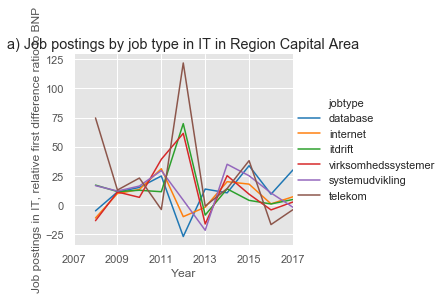

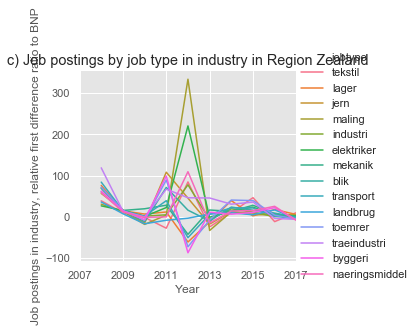

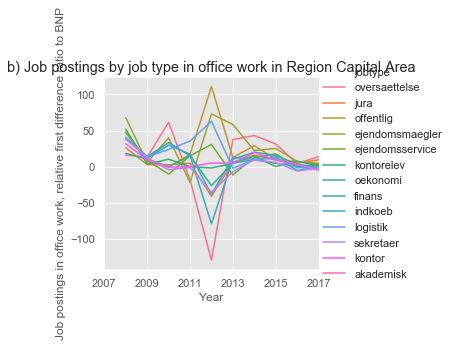

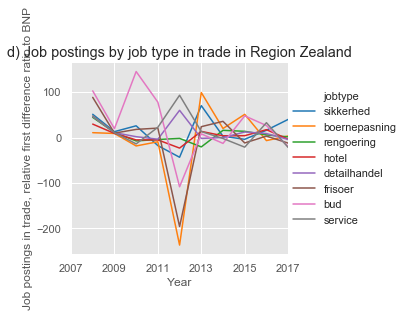

In [81]:
#KØBENHAVN IT 
sns.relplot(x="year", y="RR_jobtype_area", 
        hue="jobtype", 
        kind="line", 
        legend = "brief",        
        height=3.5, 
        aspect=1.2, 
      #  ax=ax1,
      #  hue_order=sektor_order,
        data=merged.query('area == "region hovedstaden" & sektor == "it" & jobtype != "itkurser"').sort_values(by=["year", "RR_jobtype_area"], ascending=False))
plt.title("a) Job postings by job type in IT in Region Capital Area")
plt.ylabel("Job postings in IT, relative first difference ratio to BNP")
#plt.ylim(0,0.04)
plt.xlim(2007,2017)
plt.xticks(range(2007,2018,2))
plt.xlabel("Year")

#Sjælland industri 
sns.relplot(x="year", y="RR_jobtype_area", 
        hue="jobtype", 
        kind="line", 
        legend = "brief",        
        height=3.5, 
        aspect=1.2, 
      #  ax=ax1,
      #  hue_order=sektor_order,
        data=merged.query('area == "region-sjaelland" & sektor == "industri"').sort_values(by=["year", "RR_jobtype_area"], ascending=False))
plt.title("c) Job postings by job type in industry in Region Zealand")
plt.ylabel("Job postings in industry, relative first difference ratio to BNP")
#plt.ylim(0,0.04)
plt.xlim(2007,2017)
plt.xticks(range(2007,2018,2))
plt.xlabel("Year")

#KØBENHAVN kontor
sns.relplot(x="year", y="RR_jobtype_area", 
        hue="jobtype", 
        kind="line", 
        legend = "brief",        
        height=3.5, 
        aspect=1.2, 
      #  ax=ax1,
      #  hue_order=sektor_order,
        data=merged.query('area == "region hovedstaden" & sektor == "kontor" & jobtype != "kontorkurser"').sort_values(by=["year", "RR_jobtype_area"], ascending=False))
plt.title("b) Job postings by job type in office work in Region Capital Area")
plt.ylabel("Job postings in office work, relative first difference ratio to BNP")
#plt.ylim(0,0.04)
plt.xlim(2007,2017)
plt.xticks(range(2007,2018,2))
plt.xlabel("Year")


#Sjælland handel
sns.relplot(x="year", y="RR_jobtype_area", 
        hue="jobtype", 
        kind="line", 
        legend = "brief",        
        height=3.5, 
        aspect=1.2, 
      #  ax=ax1,
      #  hue_order=sektor_order,
        data=merged.query('area == "region-sjaelland" & sektor == "handel"').sort_values(by=["year", "RR_jobtype_area"], ascending=False))
plt.title("d) Job postings by job type in trade in Region Zealand")
plt.ylabel("Job postings in trade, relative first difference ratio to BNP")
#plt.ylim(0,0.04)
plt.xlim(2007,2017)
plt.xticks(range(2007,2018,2))
plt.xlabel("Year")

